In [2]:
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav
from scipy.spatial import distance
import pandas as pd
import random
import numpy as np
import pyflann
import time
import matplotlib.pyplot as plt
%matplotlib inline  

In [115]:
marcador = ['-s','-p','-D','-o','-<','->','-^','-v']
def permutacion(data):
    i = len(data)
    datos = []
    permutacion = list(range(i))
    random.seed(448) # Para que las particiones sean las mismas cuando se corra.
    random.shuffle(permutacion)
    contador = 0
    for index in permutacion:
        if contador < i * 0.4 :
            datos.append(np.array(data.iloc[index]))
        else:
            break
    return np.array(datos) 


def aciertos (v1,v2):
    contador = 0.0
    largo = len(v1)
    i = 0
    while i < largo :
        if v1[i] == v2[i] :
            contador += 1
        i += 1
    return contador / largo

def descriptores(typeVector, R,Q):
    print(typeVector)
    mejor = []
    distancia = 1
    # Tiempo de Contrucción de Indice lineal
    flann = pyflann.FLANN()
    t0 = time.time()
    flann.build_index(R, algorithm="linear")
    print( "\t Contruccion indice lineal \t : " + str(time.time() - t0))
    # Tiempo de Búsqueda en Indice Lineal
    t0 = time.time()
    results_search, dists_search = flann.nn_index(Q, num_neighbors=1, cores=1)
    tBusquedaL = time.time() - t0
    print ("\t Tiempo Búsqueda Lineal \t : " + str(tBusquedaL))
    i = 0
    for t in range (1,4,1) : 
        # KdTree
        t0 = time.time()
        flann.build_index(R, algorithm="kdtree", trees=t)
        dt = time.time() - t0
        print ("\t Creacción index kdtree "+ str(t)+ " \t : "+ str (dt) )
        distancia , mejor = curvaDesempeno(flann, "kdtree", t , R ,Q,tBusquedaL,results_search,distancia, mejor, marcador[i%8]) 
        
        # Kmeans
        t0 = time.time()
        flann.build_index(R, algorithm="kmeans", branching = t +1)
        dt = time.time() - t0
        print ("\t Creacción index kmeans "+ str(t)+ " \t : "+ str (dt) )
        distancia , mejor = curvaDesempeno(flann, "kmeans", t + 1  , R ,Q,tBusquedaL,results_search,distancia, mejor, marcador[(i+1)%8]) 
        i = i + 2        

    plt.plot([1],[0] ,'o')
    #plt.plot([0,1.1],[1,1],'r' )
    plt.xlim(0,1.1)
    plt.ylim(-0.01,0.21)
    plt.title(typeVector)
    plt.xlabel("Efectividad")
    plt.ylabel("Eficiencia")
    plt.grid(True)
    plt.legend()
    plt.savefig(typeVector+".pdf")
    plt.show()
    print ("\t Mejor : " , mejor)
    print ("\n")
    

def curvaDesempeno(flann, alg,value, R ,Q,tBusquedaL,results_search,distancia,mejor, marcador) : 
    tiempos = []
    eficacia = []
    check = 1
    minimoLocal = 1
    while True :
        t0 = time.time()
        resultsKd, dists_search = flann.nn_index(Q, num_neighbors=1, cores=1, checks= check)
        tiempoBusqueda= (time.time() - t0)/ tBusquedaL
        efectividad = aciertos (resultsKd,results_search)
        tiempos. append (tiempoBusqueda)
        eficacia.append (efectividad)
        diferenciaOptimo = pow(pow (tiempoBusqueda,2) + pow(1- efectividad,2) , 0.5)
        if diferenciaOptimo < distancia :                     
            distancia = diferenciaOptimo
            mejor = [alg, value ,check, efectividad,tiempoBusqueda, distancia]
        if diferenciaOptimo > minimoLocal:
            break
        minimoLocal = diferenciaOptimo
        check += 1

    plt.plot(eficacia, tiempos, marcador,label = alg + " : " + str(value),linewidth = 0.6,markersize= 3)
    return distancia, mejor

In [120]:
i = 1
capitulos= []
busqueda = []
while i <= 13:
    cap = pd.read_csv("capitulos/" + str(i) +'.csv',header=None)
    capitulos.append(np.array(cap))
    busqueda.append(permutacion(cap))
    i += 1

Capitulo 1
	 Contruccion indice lineal 	 : 0.00138902664185
	 Tiempo Búsqueda Lineal 	 : 0.163718938828
	 Creacción index kdtree 1 	 : 0.00433802604675
	 Creacción index kmeans 1 	 : 0.0258359909058
	 Creacción index kdtree 2 	 : 0.00726509094238
	 Creacción index kmeans 2 	 : 0.0181751251221
	 Creacción index kdtree 3 	 : 0.010176897049
	 Creacción index kmeans 3 	 : 0.0176210403442


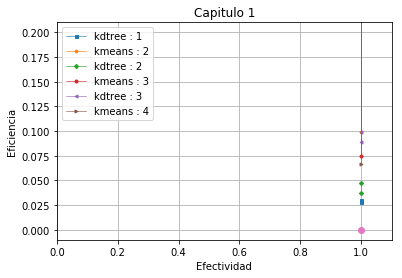

('\t Mejor : ', ['kdtree', 1, 1, 0.9978401727861771, 0.028719052494076632, 0.02880015329388195])


Capitulo 2
	 Contruccion indice lineal 	 : 0.000608921051025
	 Tiempo Búsqueda Lineal 	 : 0.25502705574
	 Creacción index kdtree 1 	 : 0.00611019134521
	 Creacción index kmeans 1 	 : 0.0426700115204
	 Creacción index kdtree 2 	 : 0.0107109546661
	 Creacción index kmeans 2 	 : 0.0234849452972
	 Creacción index kdtree 3 	 : 0.0153360366821
	 Creacción index kmeans 3 	 : 0.0155258178711


('\t Mejor : ', ['kdtree', 1, 1, 0.9971139971139971, 0.022394010812771523, 0.022579210193019266])


Capitulo 3
	 Contruccion indice lineal 	 : 0.000598907470703
	 Tiempo Búsqueda Lineal 	 : 0.171974897385
	 Creacción index kdtree 1 	 : 0.00306010246277
	 Creacción index kmeans 1 	 : 0.0544400215149
	 Creacción index kdtree 2 	 : 0.024631023407
	 Creacción index kmeans 2 	 : 0.0191080570221
	 Creacción index kdtree 3 	 : 0.00800800323486
	 Creacción index kmeans 3 	 : 0.0154900550842


('\t Mejor : ', ['kdtree', 1, 1, 0.997836278398846, 0.02503344585929864, 0.025126780588800794])


Capitulo 4
	 Contruccion indice lineal 	 : 0.000606775283813
	 Tiempo Búsqueda Lineal 	 : 0.149171113968
	 Creacción index kdtree 1 	 : 0.00299906730652
	 Creacción index kmeans 1 	 : 0.0251240730286
	 Creacción index kdtree 2 	 : 0.00930213928223
	 Creacción index kmeans 2 	 : 0.0283639431
	 Creacción index kdtree 3 	 : 0.0141048431396
	 Creacción index kmeans 3 	 : 0.0183749198914


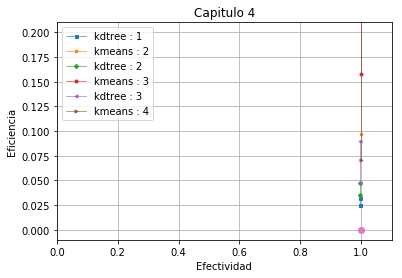

('\t Mejor : ', ['kdtree', 1, 1, 0.9973929236499068, 0.024776679042752638, 0.0249134636588892])


Capitulo 5
	 Contruccion indice lineal 	 : 0.00058913230896
	 Tiempo Búsqueda Lineal 	 : 0.351253986359
	 Creacción index kdtree 1 	 : 0.00317001342773
	 Creacción index kmeans 1 	 : 0.0237319469452
	 Creacción index kdtree 2 	 : 0.00683498382568
	 Creacción index kmeans 2 	 : 0.015792131424
	 Creacción index kdtree 3 	 : 0.011353969574
	 Creacción index kmeans 3 	 : 0.0336318016052


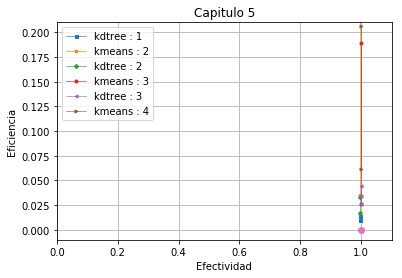

('\t Mejor : ', ['kdtree', 1, 1, 0.9970588235294118, 0.010340291569886225, 0.010750448771163088])


Capitulo 6
	 Contruccion indice lineal 	 : 0.000769853591919
	 Tiempo Búsqueda Lineal 	 : 0.173558950424
	 Creacción index kdtree 1 	 : 0.00256395339966
	 Creacción index kmeans 1 	 : 0.0343170166016
	 Creacción index kdtree 2 	 : 0.0136888027191
	 Creacción index kmeans 2 	 : 0.0217790603638
	 Creacción index kdtree 3 	 : 0.00973081588745
	 Creacción index kmeans 3 	 : 0.0204319953918


('\t Mejor : ', ['kdtree', 2, 1, 0.997471098265896, 0.03385080753174286, 0.03394513977776279])


Capitulo 7
	 Contruccion indice lineal 	 : 0.000614881515503
	 Tiempo Búsqueda Lineal 	 : 0.161744117737
	 Creacción index kdtree 1 	 : 0.00277400016785
	 Creacción index kmeans 1 	 : 0.0253129005432
	 Creacción index kdtree 2 	 : 0.00693511962891
	 Creacción index kmeans 2 	 : 0.0153050422668
	 Creacción index kdtree 3 	 : 0.0106718540192
	 Creacción index kmeans 3 	 : 0.0143730640411


('\t Mejor : ', ['kdtree', 1, 1, 0.9971087820744489, 0.02302462839252127, 0.023205444484144768])


Capitulo 8
	 Contruccion indice lineal 	 : 0.000486850738525
	 Tiempo Búsqueda Lineal 	 : 0.155602931976
	 Creacción index kdtree 1 	 : 0.00281000137329
	 Creacción index kmeans 1 	 : 0.0218579769135
	 Creacción index kdtree 2 	 : 0.00689506530762
	 Creacción index kmeans 2 	 : 0.015105009079
	 Creacción index kdtree 3 	 : 0.00807404518127
	 Creacción index kmeans 3 	 : 0.0142800807953


('\t Mejor : ', ['kdtree', 1, 1, 0.9970631424375918, 0.024838886624602003, 0.025011905586974113])


Capitulo 9
	 Contruccion indice lineal 	 : 0.000536918640137
	 Tiempo Búsqueda Lineal 	 : 0.156832933426
	 Creacción index kdtree 1 	 : 0.00277400016785
	 Creacción index kmeans 1 	 : 0.0231640338898
	 Creacción index kdtree 2 	 : 0.00701403617859
	 Creacción index kmeans 2 	 : 0.0153300762177
	 Creacción index kdtree 3 	 : 0.00800681114197
	 Creacción index kmeans 3 	 : 0.0142979621887


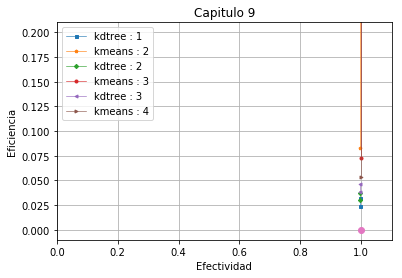

('\t Mejor : ', ['kdtree', 1, 1, 0.9967497291440953, 0.024561990255470845, 0.024776109984147796])


Capitulo 10
	 Contruccion indice lineal 	 : 0.00059700012207
	 Tiempo Búsqueda Lineal 	 : 0.155450105667
	 Creacción index kdtree 1 	 : 0.00288891792297
	 Creacción index kmeans 1 	 : 0.0241692066193
	 Creacción index kdtree 2 	 : 0.00692200660706
	 Creacción index kmeans 2 	 : 0.0184791088104
	 Creacción index kdtree 3 	 : 0.00805902481079
	 Creacción index kmeans 3 	 : 0.0146098136902


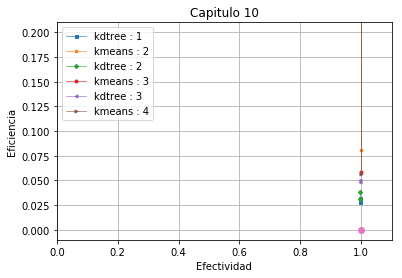

('\t Mejor : ', ['kdtree', 1, 1, 0.9971045964531307, 0.028093342842462864, 0.028242154198350078])


Capitulo 11
	 Contruccion indice lineal 	 : 0.000458955764771
	 Tiempo Búsqueda Lineal 	 : 0.151484012604
	 Creacción index kdtree 1 	 : 0.00431895256042
	 Creacción index kmeans 1 	 : 0.0236821174622
	 Creacción index kdtree 2 	 : 0.00716590881348
	 Creacción index kmeans 2 	 : 0.015506029129
	 Creacción index kdtree 3 	 : 0.00804018974304
	 Creacción index kmeans 3 	 : 0.0144329071045


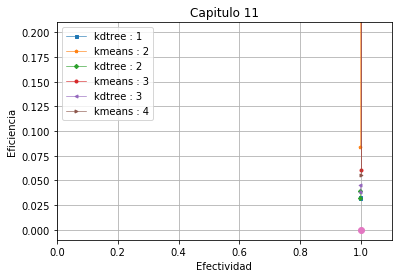

('\t Mejor : ', ['kdtree', 1, 1, 0.9974765681326604, 0.032049042290319026, 0.03214823199051174])


Capitulo 12
	 Contruccion indice lineal 	 : 0.000852108001709
	 Tiempo Búsqueda Lineal 	 : 0.156355857849
	 Creacción index kdtree 1 	 : 0.00280499458313
	 Creacción index kmeans 1 	 : 0.0234169960022
	 Creacción index kdtree 2 	 : 0.00696897506714
	 Creacción index kmeans 2 	 : 0.0153479576111
	 Creacción index kdtree 3 	 : 0.00804805755615
	 Creacción index kmeans 3 	 : 0.016350030899


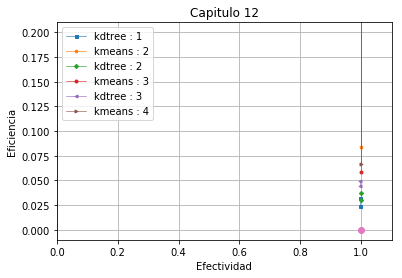

('\t Mejor : ', ['kdtree', 1, 1, 0.997473836160231, 0.024572890680752177, 0.024702397862425292])


Capitulo 13
	 Contruccion indice lineal 	 : 0.000555992126465
	 Tiempo Búsqueda Lineal 	 : 0.151784181595
	 Creacción index kdtree 1 	 : 0.00427293777466
	 Creacción index kmeans 1 	 : 0.0216381549835
	 Creacción index kdtree 2 	 : 0.00693702697754
	 Creacción index kmeans 2 	 : 0.017746925354
	 Creacción index kdtree 3 	 : 0.00879216194153
	 Creacción index kmeans 3 	 : 0.0173230171204


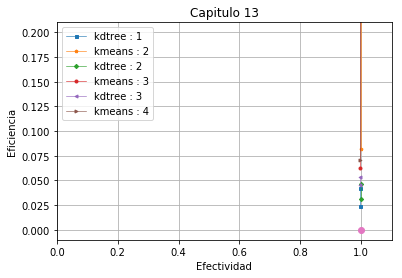

('\t Mejor : ', ['kdtree', 1, 1, 0.9967177242888403, 0.02468627725095778, 0.02490352622331272])




In [122]:
i = 1
while i <= 13 :
    descriptores("Capitulo "+ str(i) , capitulos[i-1], busqueda[i-1])
    i+=1